<a href="https://colab.research.google.com/github/Mahalak4401/Deep-Learning-projects/blob/main/chrun_Modelling_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chrun Modelling analysis using ANN**

In [ ]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Data Preprocessing
X=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
X[:,2]

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [ ]:
#Gender replace the lable to number
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
#Geography location
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
print(X)


[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train)

[[ 0.98511083 -0.57581067 -0.56734211 ... -1.55431138 -1.02969058
  -1.14664965]
 [ 0.98511083 -0.57581067 -0.56734211 ...  0.64337173 -1.02969058
  -1.17462144]
 [ 0.98511083 -0.57581067 -0.56734211 ...  0.64337173  0.97116554
  -0.02801431]
 ...
 [ 0.98511083 -0.57581067 -0.56734211 ...  0.64337173 -1.02969058
  -0.5664927 ]
 [ 0.98511083 -0.57581067 -0.56734211 ...  0.64337173  0.97116554
  -0.35068877]
 [-1.01511421  1.73668197 -0.56734211 ...  0.64337173 -1.02969058
   0.09161135]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam

ann=Sequential()
ann.add(Dense(12,activation='relu',input_shape=X_train[0].shape))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

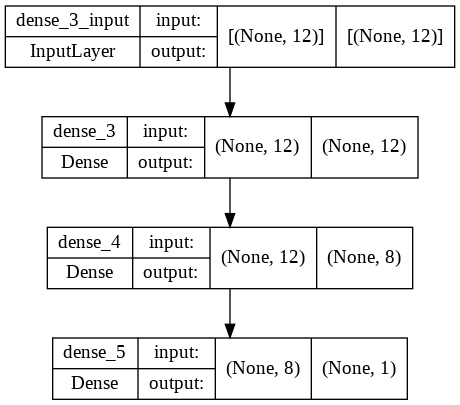

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(ann,to_file="model.png",show_shapes=True,show_layer_names=True,)

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
ann.fit(X_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7962
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.8080
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8224
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8319
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8415
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8478
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8528
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8543
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8546
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8559

In [ ]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

In [ ]:
pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual','Predicted'])

,Actual,Predicted
0,0,[False]
1,0,[False]
2,0,[False]
3,0,[False]
4,0,[False]
...,...,...
1995,0,[False]
1996,0,[False]
1997,0,[False]
1998,0,[False]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1507   90]
 [ 182  221]]
0.864
